# Klassifikation der Anfänge von Kurzgeschichten nach ihrem Informationsgrad

In [1]:
pip install python-dotenv


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [4]:
file_path = 'Kurzgeschichten_Anfaenge_DHD_2025.xlsx'

In [5]:
df = pd.read_excel(file_path)

In [6]:
df.tail()

,Autor,Titel,Absatz,Eingangssatz,Person,Gegenstand,Ort,Zeit,Score,Klassifikation
50,Marti,Neapel sehen,NaN,Er hatte eine Bretterwand gebaut.,1,3,0,0,4,wenig Information
51,Kluge,Ein Liebesversuch,NaN,"Als das billigste Mittel, in den Lagern Massen...",0,3,2,3,8,viel Information
52,Fühmann,Das Judenauto,NaN,Wie tief hinab reicht das Erinnern?,0,2,0,0,2,sehr wenig Information
53,Bichsel,San Salvador,NaN,Er hatte sich eine Füllfeder gekauft.,1,3,0,0,4,wenig Information
54,Kaschnitz,Vogel Rock,NaN,Kurz vor drei Uhr bemerkte ich den Vogel in me...,1,2,2,2,7,viel Information


In [7]:
df.Klassifikation.value_counts()

Klassifikation
sehr wenig Information    25
wenig Information         22
viel Information           8
Name: count, dtype: int64

In [8]:
len(df)

55

In [9]:
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

Text(0.5, 1.0, 'Histogramm')

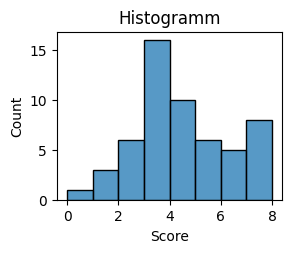

In [10]:
# Histogramm
plt.subplot(2, 2, 1)
sns.histplot(df['Score'], kde=False)
plt.title('Histogramm')

<Figure size 1000x600 with 0 Axes>

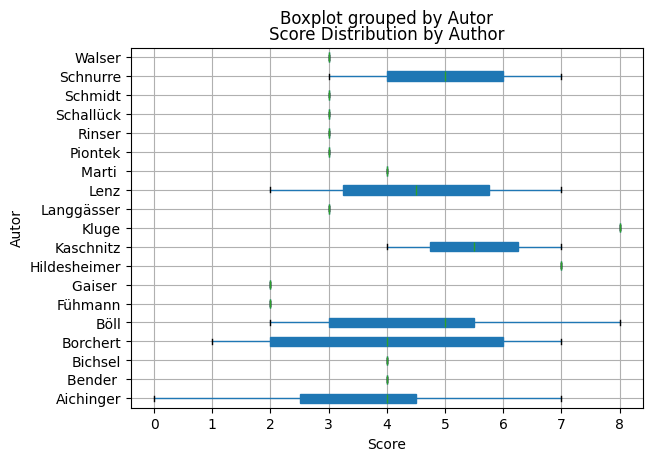

In [14]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))

df.boxplot(column='Score', by='Autor', vert=False, patch_artist=True)
plt.xlabel('Score')
plt.ylabel('Autor')
_ = plt.title('Score Distribution by Author')

# Speichern des Plots als JPEG-Datei
plt.savefig('score_distribution_by_author.jpeg', format='jpeg')


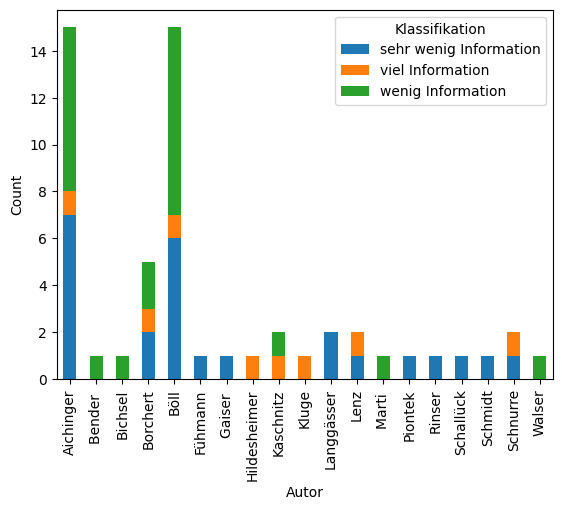

In [15]:
df.groupby(['Autor', 'Klassifikation'])['Klassifikation'].count().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Autor')
_ = plt.ylabel('Count')

# Speichern des Plots als JPEG-Datei
plt.savefig('count_per_author.jpeg', format='jpeg')

/var/folders/jg/l9chph5j5r385k1sk8bwp3r40000gn/T/ipykernel_95376/7105452.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Klassifikation'] = pd.Categorical(filtered_df['Klassifikation'], categories=cat_order, ordered=True)


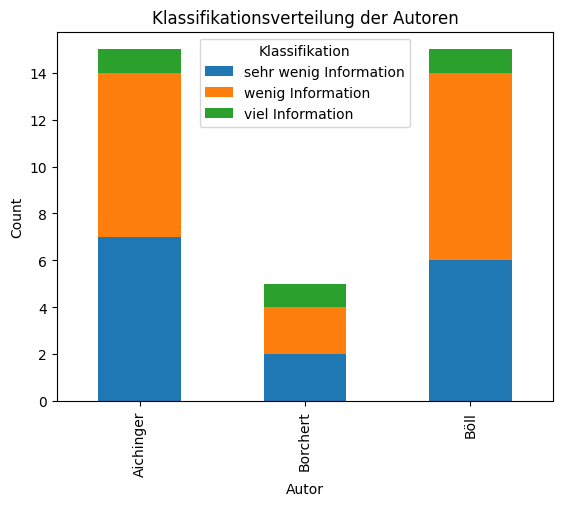

In [17]:
# Filtere den DataFrame, um nur die gewünschten Autoren zu behalten
filtered_df = df[df['Autor'].isin(['Aichinger', 'Böll', 'Borchert'])]

# Definiere die Reihenfolge der Kategorien
cat_order = ['sehr wenig Information', 'wenig Information', 'viel Information']

# Wandeln der Klassifikation-Spalte in eine kategorische Variable mit definierter Reihenfolge
filtered_df['Klassifikation'] = pd.Categorical(filtered_df['Klassifikation'], categories=cat_order, ordered=True)

# Gruppieren und Plotten
filtered_df.groupby(['Autor', 'Klassifikation'])['Klassifikation'].count().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Autor')
plt.ylabel('Count')
plt.title('Klassifikationsverteilung der Autoren')
plt.show()


<Figure size 1000x600 with 0 Axes>

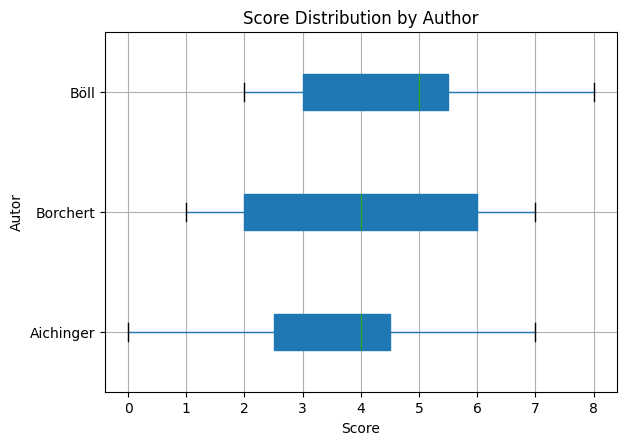

In [18]:
# Filtere den DataFrame, um nur die gewünschten Autoren zu behalten
filtered_df = df[df['Autor'].isin(['Aichinger', 'Böll', 'Borchert'])]

# Erstellen des Boxplots
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='Score', by='Autor', vert=False, patch_artist=True)
plt.xlabel('Score')
plt.ylabel('Autor')
plt.title('Score Distribution by Author')
plt.suptitle('')  # Entferne den überflüssigen Titel
plt.show()